In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition

In [2]:
df = pd.read_csv('data/bearings.csv', index_col=0, parse_dates=[0])
df

,Bearing_1,Bearing_2,Bearing_3,Bearing_4
date,,,,
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
...,...,...,...,...
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817


In [3]:
X0 = df.values
print(X0.shape, X0.dtype)

(984, 4) float64


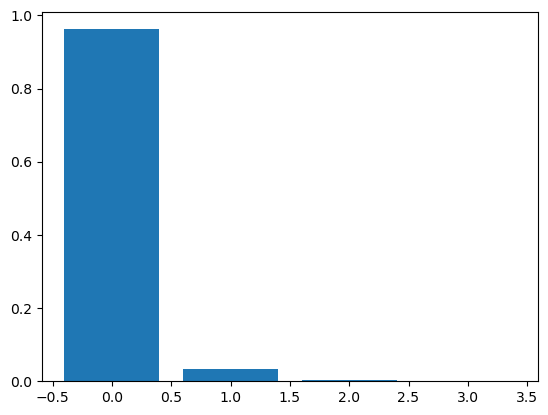

In [4]:
pca_sk = decomposition.PCA()
pca_sk.fit(X0)
sk_cs = pca_sk.components_
sk_c0 = pca_sk.mean_
sk_a1 = sk_cs[0,:]
sk_a2 = sk_cs[1,:]
plt.bar(range(4), pca_sk.explained_variance_ratio_)
plt.show()

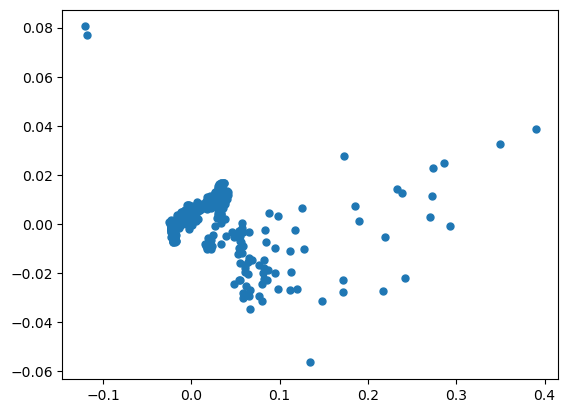

In [5]:
U0 = pca_sk.transform(X0)
plt.scatter(U0[:,0], U0[:,1], s=25)
plt.show()

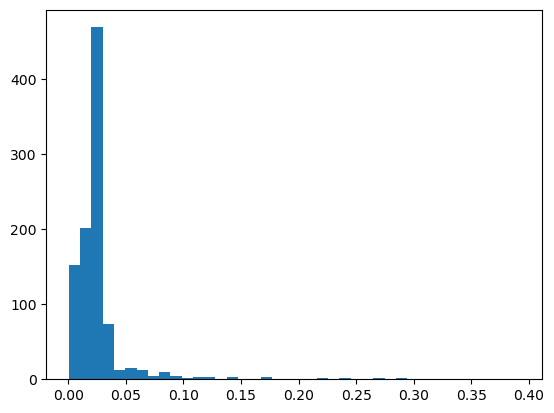

[0.08090528 0.07853173 0.08135603 0.04782207]


In [6]:
c0 = pca.location(X0)
# plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3, color='w', markeredgecolor='k')
plt.hist(pca.distance_center(X0, c0), bins=40)
plt.show()
print(c0)

0.5


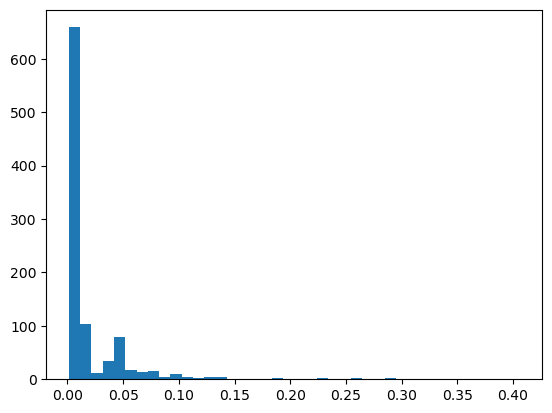

[0.06788383 0.07536752 0.07835748 0.04504646]


In [7]:
N = len(X0)
# alpha = (N - 100) / N
alpha = 0.5
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
c = pca.robust_location(X0, wma)
plt.hist(pca.distance_center(X0, c), bins=40)
# plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

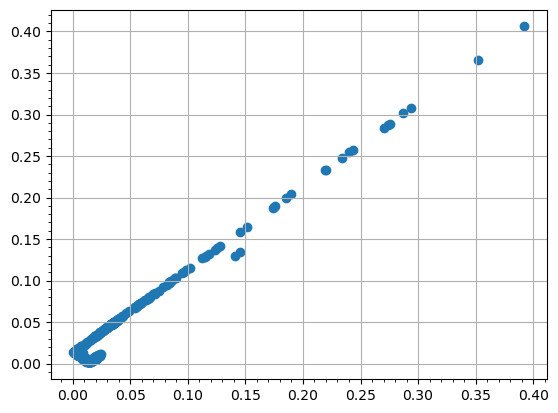

In [8]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [9]:
X1 = X0 - c
X1_0 = X0 - c0

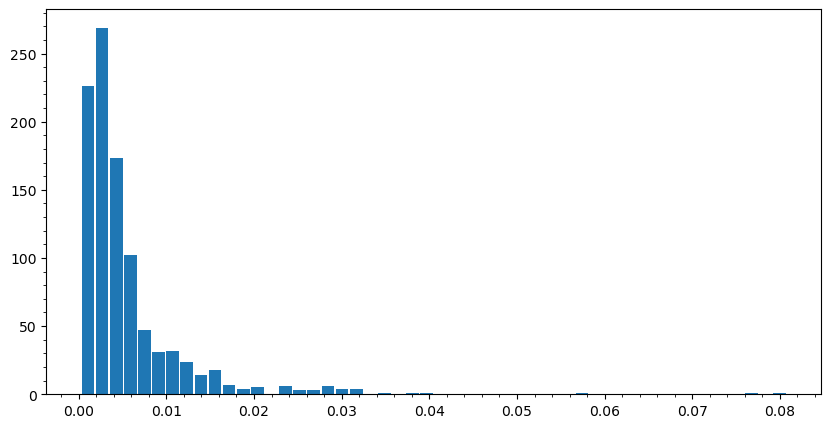

0.001901243598898313 [0.91806183 0.24843237 0.22577287 0.21088017]


In [10]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.figure(figsize=(10,5))
plt.hist(pca.distance_line(X1_0, a1_0), bins=50, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, color='w', markeredgecolor='k')
plt.minorticks_on()
plt.show()
print(L1_0, a1_0)

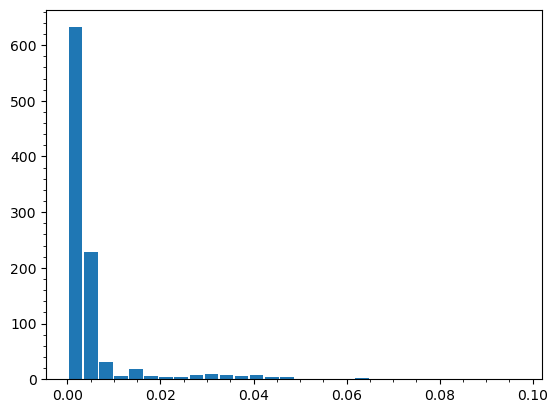

0.0005002148540143067 [0.9680802  0.15083243 0.11477108 0.1640058 ]


In [11]:
# N = len(X0)
# alpha = (N - 20) / N
# print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a1, L1 = pca.find_robust_pc(X1, wma)

plt.hist(pca.distance_line(X1, a1), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.minorticks_on()
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

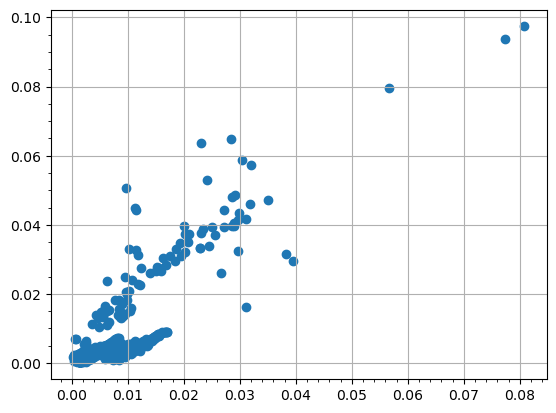

In [12]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [13]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

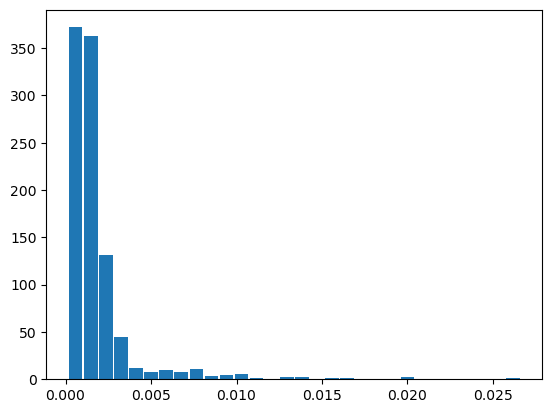

0.0001201493689499156 [-0.22447675  0.58740885  0.72684298  0.27615268]


In [14]:
a2_0, L2_0 = pca.find_pc(X2)
plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

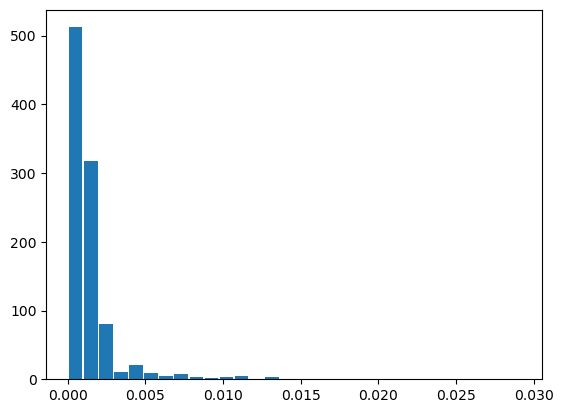

3.129722972298769e-05 [-0.22119513  0.58382388  0.73972145  0.25106688]


In [15]:
# N = len(X0)
# alpha = (N - 10) / N
# print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a2, L2 = pca.find_robust_pc(X2, wma)
plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

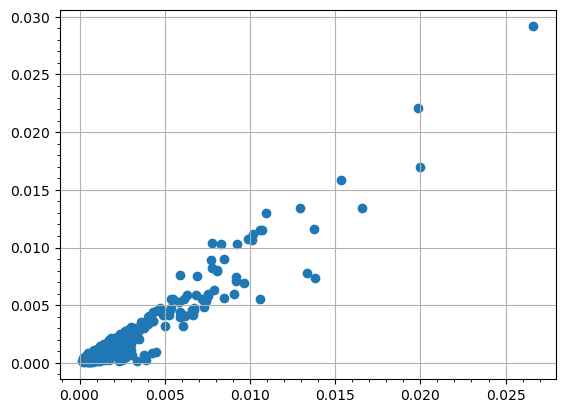

In [16]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

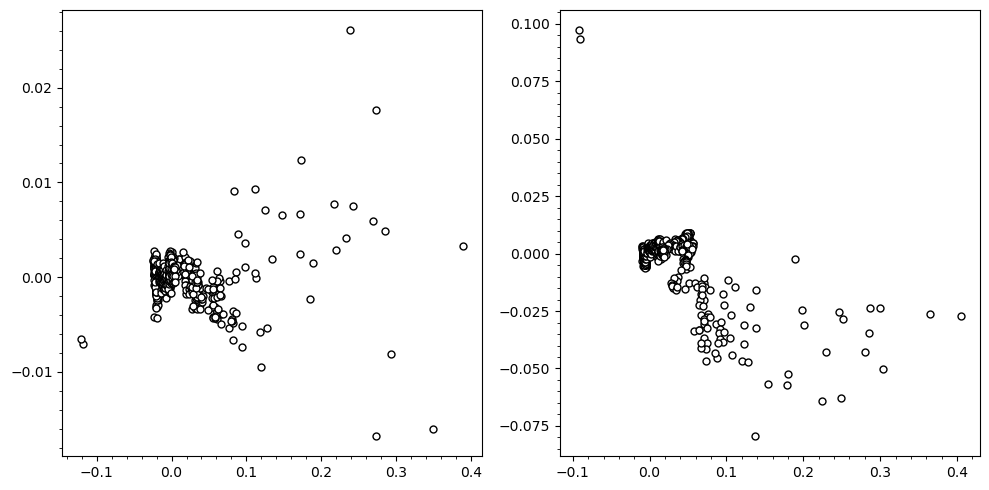

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(U0[:,0], U0[:,2], s=25, c='w', edgecolors='k')
plt.minorticks_on()
plt.subplot(1,2,2)
plt.scatter(U1, -U2, s=25, c='w', edgecolors='k')
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [18]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [41]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.9, 0.1))
S = pca.robust_scatter_matrix(X1, wma)
print(S)

[[ 0.20213161  0.02662057  0.22810066 -1.14041935]
 [ 0.02662057  9.5570287  -5.05860122 -5.79620974]
 [ 0.22810066 -5.05860122  4.1702007   0.35751263]
 [-1.14041935 -5.79620974  0.35751263 11.74646568]] 6.94459304103562e-05
[[ 0.20107721  0.03515501  0.21747422 -1.13886447]
 [ 0.03515501  9.61560272 -5.08102595 -5.89878286]
 [ 0.21747422 -5.08102595  4.1514951   0.45183806]
 [-1.13886447 -5.89878286  0.45183806 11.80463694]] 6.943402226024447e-05
[[ 0.20107573  0.03514862  0.21747633 -1.13885622]
 [ 0.03514862  9.61559069 -5.08102324 -5.89875697]
 [ 0.21747633 -5.08102324  4.15150048  0.45181906]
 [-1.13885622 -5.89875697  0.45181906 11.80462388]] 6.943402225163169e-05
K: 2
[[ 0.20107573  0.03514862  0.21747633 -1.13885622]
 [ 0.03514862  9.61559069 -5.08102324 -5.89875697]
 [ 0.21747633 -5.08102324  4.15150048  0.45181906]
 [-1.13885622 -5.89875697  0.45181906 11.80462388]]


In [42]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 0.04272776 -0.11719474  0.92939446 -0.34736963]
 [ 0.66904739  0.45085848  0.22957685  0.54442326]
 [-0.2718548  -0.58803707  0.21183934  0.73173183]
 [-0.69039474  0.66121437  0.19658203  0.21795912]]


0.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


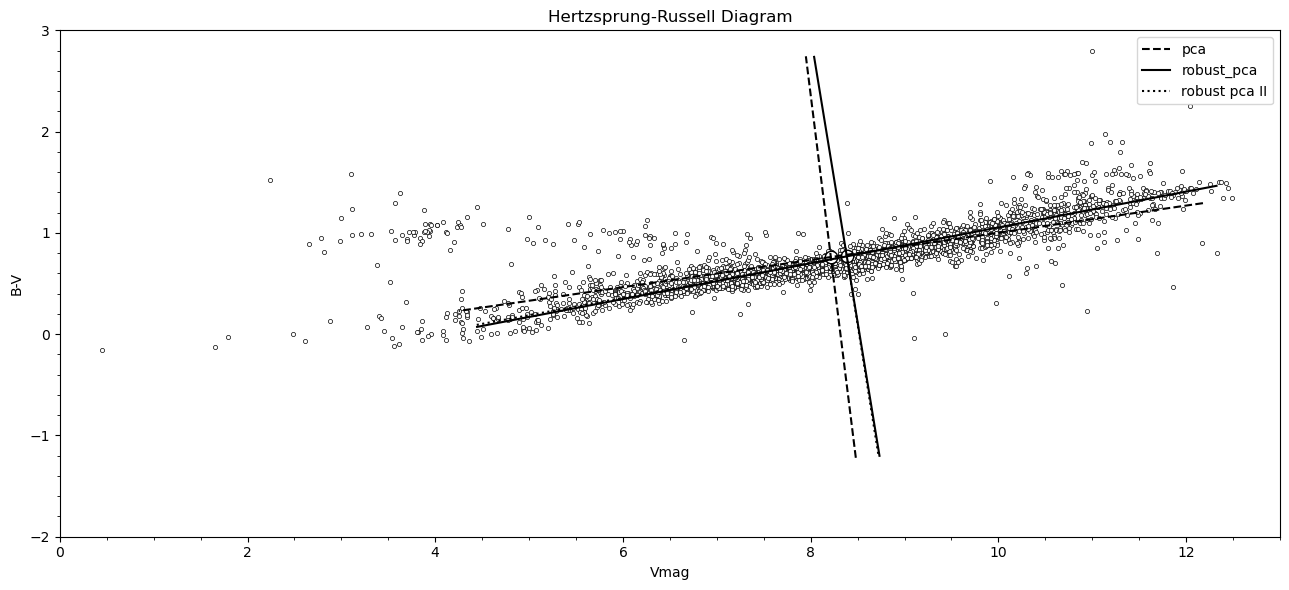

In [24]:
plt.figure(figsize=(13,6))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], 
         label='pca', linestyle='--', c='k')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]],
        linestyle='--', c='k')
plt.plot([c[0]-4*a1[0], c[0]+4*a1[0]], [c[1]-4*a1[1], c[1]+4*a1[1]], 
         label='robust_pca', linestyle='-', c='k')
plt.plot([c[0]-2*a2[0], c[0]+2*a2[0]], [c[1]-2*a2[1], c[1]+2*a2[1]],
        linestyle='-', c='k')
plt.plot([c[0]+4*A[0,0], c[0], c[0]+2*A[0,1]], [c[1]+4*A[1,0], c[1], c[1]+2*A[1,1]], 
         c='k', linestyle=':', label='robust pca II')
plt.legend()
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(0,13)
plt.ylim(-2,3)
plt.tight_layout()
plt.savefig('fig/robust_pca_HIP_star_1.eps')
plt.show()